In [123]:
# 데이터 분석
import pandas as pd # 데이터 분석(데이터로딩 -> 시각화 -> 컬럼별 분석) 하는 패키지
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

# 시각화
import seaborn as sns #시각화 패키지
import matplotlib.pyplot as plt

# 기계 학습
from sklearn.linear_model import LogisticRegression #
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## 데이터로딩 및 확인

In [124]:
# 데이터 로딩
train_df = pd.read_csv('./train.csv') # 절대경로(/user/~~, 상대경로(./~~)가 있음.
# 판다스에서 지원하는 데이터프레임 타입/자료구조(int,string 이런타입)
test_df = pd.read_csv('./test.csv')

train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [125]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 데이터 전처리
## 1) 날짜로 된 datetime열을 쪼개기

In [126]:
# 참고 url : https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F
# datetime 열을 to_datetime을 이용하여 시간 데이터를 나눈다.
# train 데이터 쪼개기
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

# 년도부터 초까지 각 열을 생성한다.
train_df['Year'] = train_df['datetime'].dt.year
train_df['Month'] = train_df['datetime'].dt.month
train_df['Day'] = train_df['datetime'].dt.day
train_df['Hour'] = train_df['datetime'].dt.hour
train_df['Minute'] = train_df['datetime'].dt.minute
train_df['Second'] = train_df['datetime'].dt.second

# test 데이터도 동일하게
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# 년도부터 초까지 각 열을 생성한다.
test_df['Year'] = test_df['datetime'].dt.year
test_df['Month'] = test_df['datetime'].dt.month
test_df['Day'] = test_df['datetime'].dt.day
test_df['Hour'] = test_df['datetime'].dt.hour
test_df['Minute'] = test_df['datetime'].dt.minute
test_df['Second'] = test_df['datetime'].dt.second

# 추가된 열 확인
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [127]:
# 여기서 확인할 수 있는 것은 '분'과 '초'가 모두 0이라는 사실이다.
train_df.sum() # 데이터를 모두 sum해서 0인 것을 확인

season        2.728700e+04
holiday       3.110000e+02
workingday    7.412000e+03
weather       1.544100e+04
temp          2.202331e+05
atemp         2.575092e+05
humidity      6.736960e+05
windspeed     1.393342e+05
casual        3.921350e+05
registered    1.693341e+06
count         2.085476e+06
Year          2.189721e+07
Month         7.099300e+04
Day           1.087790e+05
Hour          1.256420e+05
Minute        0.000000e+00
Second        0.000000e+00
dtype: float64

## 2) season에 대한 데이터 처리
위 데이터를 보다보면 또하나 이상한 점이 있다.
month가 1월인데 season은 봄인 1을 표현하고 있다.
우리나라 데이터가 아니여서 일까..일단 우리나라에 맞게 "3월, 4월, 5월은 봄" / "6월, 7월, 8월은 여름" / "9월, 10월, 11월은 가을" / "12월, 1월, 2월은 겨울"로 데이터를 다시 만든다.

In [128]:
def korea_season(month):
    if month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    elif month in [12,1,2]:
        return 4

# train 데이터
train_df['korea_season'] = train_df['Month'].apply(korea_season)
# test 데이터
test_df['korea_season'] = test_df['Month'].apply(korea_season)

In [129]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second,korea_season
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,4
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,4
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,4
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,4
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,4


In [130]:
corr = train_df.corr()
corr['count']

season          0.163439
holiday        -0.005393
workingday      0.011594
weather        -0.128655
temp            0.394454
atemp           0.389784
humidity       -0.317371
windspeed       0.101369
casual          0.690414
registered      0.970948
count           1.000000
Year            0.260403
Month           0.166862
Day             0.019826
Hour            0.400601
Minute               NaN
Second               NaN
korea_season   -0.118785
Name: count, dtype: float64

## 3) weather 데이터에 대한 전처리

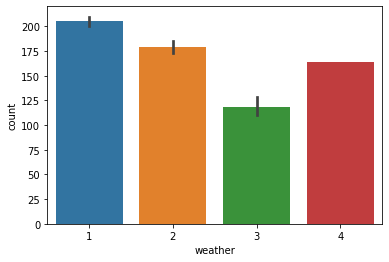

In [131]:
# weather 데이터는 1 ~ 4로 표현되고 있으며, 숫자가 높을수록 날씨가 좋지 않음을 의미
sns.barplot(data=train_df, x='weather', y='count')

In [132]:
# 위 바차트에서 보면 날씨가 안좋은 4가 3보다 높게 보여진다.
# 4에 대한 데이터를 확인해보자
train_df[train_df['weather']==3]
train_df[train_df['weather']==4]
# 3은 800건이 넘는 반면 3은 1건 밖에 없어서 3보다 좋은 결과를 보여주는 것 같다.
# 4가 한건이니 3으로 봐도 무방하다는 가정하에 4를 3으로 바꿔준다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second,korea_season
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,4


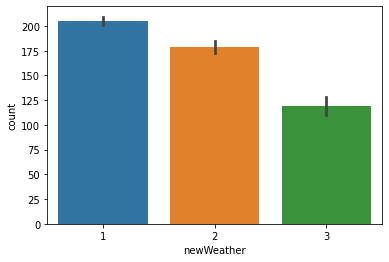

In [133]:
train_df['newWeather'] = np.where(train_df['weather']>3, 3, train_df['weather'])

# weather 4가 사라진 것을 확인
train_df[train_df['newWeather']==4]

# test데이터 똑같이 전처리
test_df['newWeather'] = np.where(test_df['weather']>3, 3, test_df['weather'])

# 전처리 후 다시 시각화해서 확인
sns.barplot(data=train_df, x='newWeather', y='count')

## 4) count 데이터에 대한 전처리

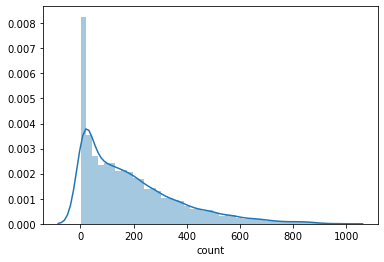

In [134]:
# count의 분포를 확인
sns.distplot(train_df['count'])

# 여기서 왼쪽으로 쏠려 있음을 확인할 수 있다.

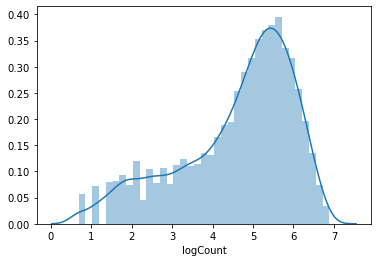

In [135]:
# log를 취해서 분포를 고르게 한다.
train_df['logCount'] = np.log(train_df['count'] + 1)
sns.distplot(train_df['logCount'])

## 본격적인 예측

In [136]:
# 각 속성들은 feature변수에 저장
# 여기서 체감온도인 atemp는 temp와 비슷한 데이터 추이를 보이므로 예측에 활용하지 않아본다.
feature=['Year', 'Month', 'Hour', 'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']

# 학습할 X_train 변수 선언
X_train=train_df[feature]
X_train.head()

,Year,Month,Hour,season,workingday,weather,temp,humidity,windspeed
0,2011,1,0,1,0,1,9.84,81,0.0
1,2011,1,1,1,0,1,9.02,80,0.0
2,2011,1,2,1,0,1,9.02,80,0.0
3,2011,1,3,1,0,1,9.84,75,0.0
4,2011,1,4,1,0,1,9.84,75,0.0


In [137]:
# 테스트데이터
# 학습할 X_train 변수 선언
X_test=train_df[feature]
X_test.head()

,Year,Month,Hour,season,workingday,weather,temp,humidity,windspeed
0,2011,1,0,1,0,1,9.84,81,0.0
1,2011,1,1,1,0,1,9.02,80,0.0
2,2011,1,2,1,0,1,9.02,80,0.0
3,2011,1,3,1,0,1,9.84,75,0.0
4,2011,1,4,1,0,1,9.84,75,0.0


In [138]:
# 예측해야 하는 속성 Y_train 변수 선언
Y_train=train_df['logCount']
Y_train.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: logCount, dtype: float64

In [139]:
model=RandomForestRegressor(n_estimators=100, max_depth=30, max_features=0.9, n_jobs=-1, random_state=7)

model.fit(X_train, Y_train)
# test데이터 예측
Y_pred=model.predict(X_test)
# 우리 Y_train은 log가 취해진 것이므로 log를 되돌림
pred=np.exp(Y_pred)-1

# 정확도 확인
acc_log = round(model.score(X_train, Y_train) * 100, 2) # training 데이터에 대해 예측 정확도 구함
acc_log

99.25